In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-top250-india/IMdB_India_Top250.csv


In [2]:
import pandas as pd

file_path = '/kaggle/input/imdb-top250-india/IMdB_India_Top250.csv'
df = pd.read_csv(file_path)

df.head()

,Movie name,Year of release,Watch hour,Rating,Ratedby,Film Industry,Genre,Director,Box office collection,User reviews,Awards,Description,Streaming platform
0,12th Fail,2023,2 hours 27 minutes,8.9,126K,Bollywood (Hindi),"Drama, Biography",Vidhu Vinod Chopra,"$138,288.00",945,23 wins & 32 nominations,The real-life story of IPS Officer Manoj Kumar...,SonyLIV
1,Gol Maal,1979,2 hours,8.5,20K,Bollywood (Hindi),Comedy,Hrishikesh Mukherjee,NIL,48,3 wins & 1 nomination,A man's simple lie to secure his job escalates...,"Amazon Prime Video, YouTube, Zee5"
2,Maharaja,2024,2 hours 30 minutes,8.6,37K,Kollywood (Tamil),"Crime, Drama",Nithilan Saminathan,"$975,543.00",370,2 nominations,A barber seeks vengeance after his home is bur...,Netflix
3,Nayakan,1987,2 hours 25 minutes,8.7,25K,Kollywood (Tamil),"Crime, Drama",Mani Ratnam,"$120,481.93",237,7 wins & 1 nomination,A common man's struggles against a corrupt pol...,"Amazon Prime Video, YouTube"
4,The World of Apu,1959,1 hour 45 minutes,8.4,17K,Bengali Cinema,Drama,Satyajit Ray,"$134,241.00",62,4 wins & 2 nominations total,This final installment in Satyajit Ray's Apu T...,"Amazon Prime Video, Hoichoi"


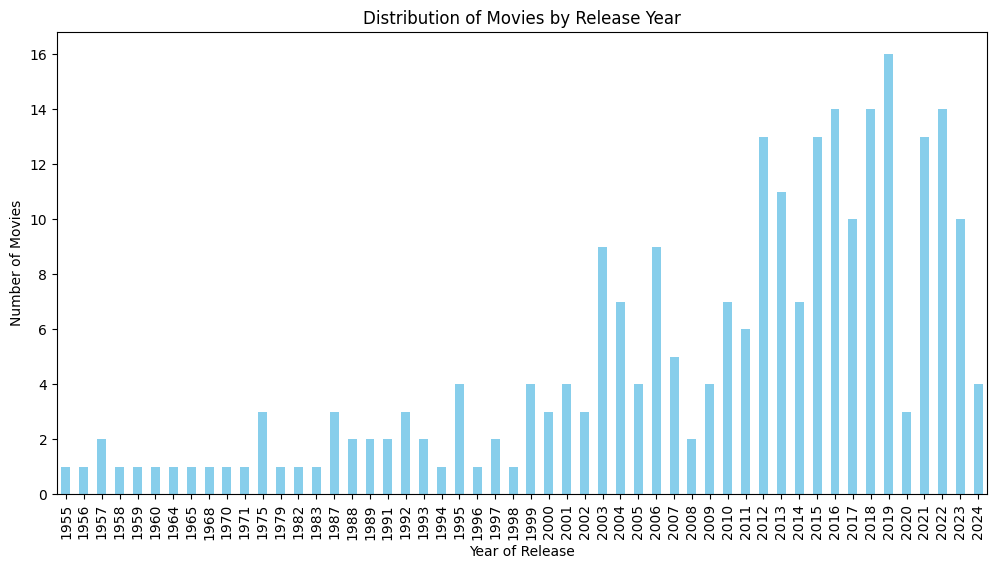

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['Year of release'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.show()


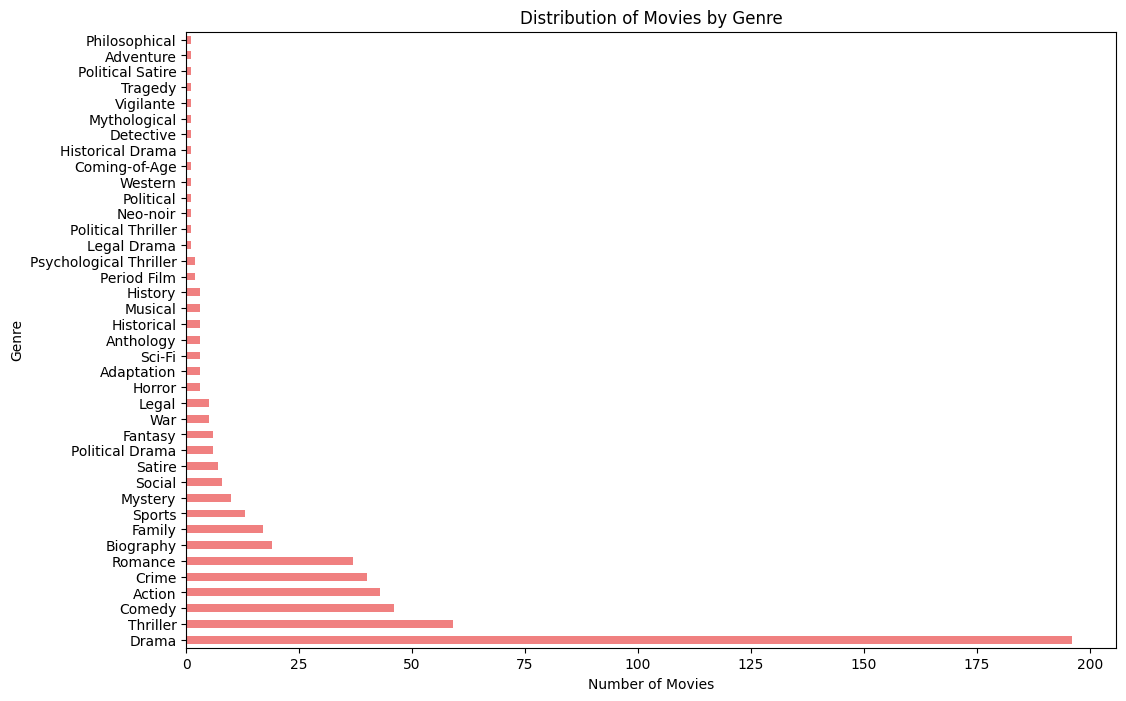

In [4]:
genres = df['Genre'].str.split(',', expand=True).stack().str.strip().value_counts()

plt.figure(figsize=(12, 8))
genres.plot(kind='barh', color='lightcoral')
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


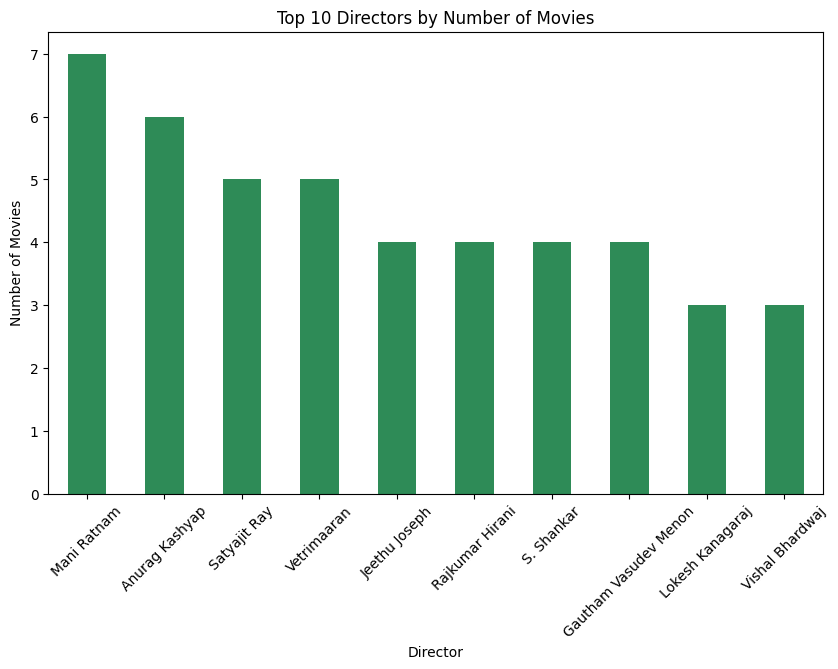

In [5]:
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='seagreen')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


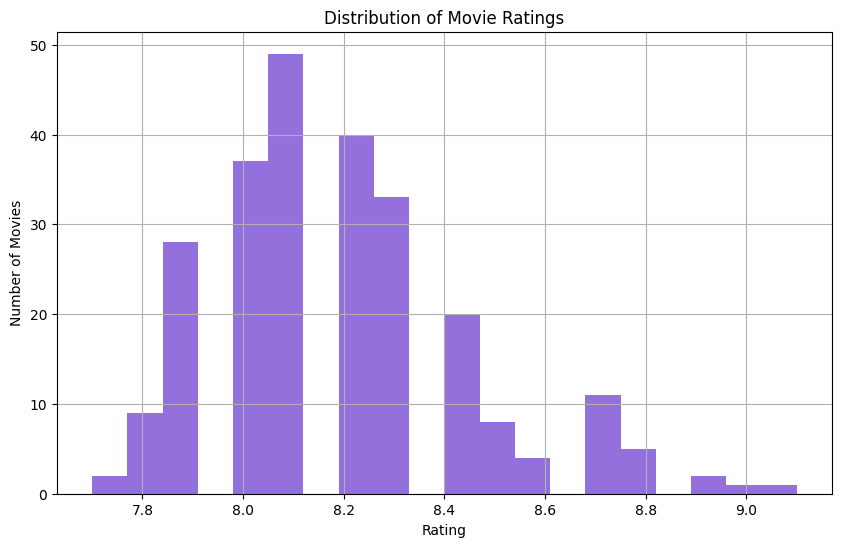

In [6]:
plt.figure(figsize=(10, 6))
df['Rating'].hist(bins=20, color='mediumpurple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


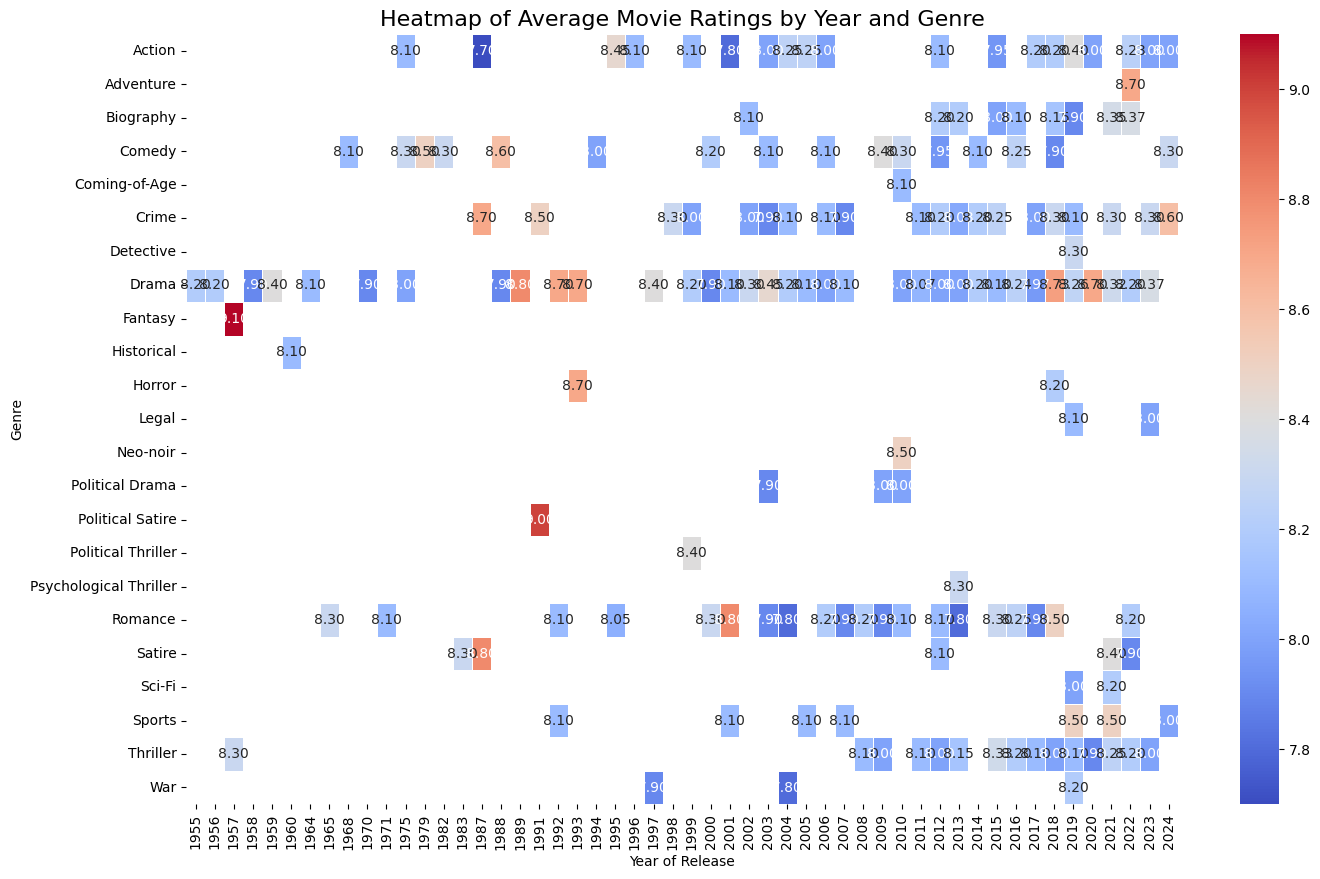

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Year of release'] = df['Year of release'].astype(int)
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

pivot_data = df.pivot_table(index='Genre', columns='Year of release', values='Rating', aggfunc='mean')

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Average Movie Ratings by Year and Genre', fontsize=16)
plt.xlabel('Year of Release')
plt.ylabel('Genre')
plt.show()


In [8]:
import plotly.express as px

df['Year of release'] = df['Year of release'].astype(str)

fig = px.sunburst(df, path=['Genre', 'Director', 'Year of release'], values='Rating',
                  color='Rating', hover_data=['Rating'],
                  color_continuous_scale='RdBu',
                  title='Sunburst of Movie Counts by Genre, Director, and Year')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


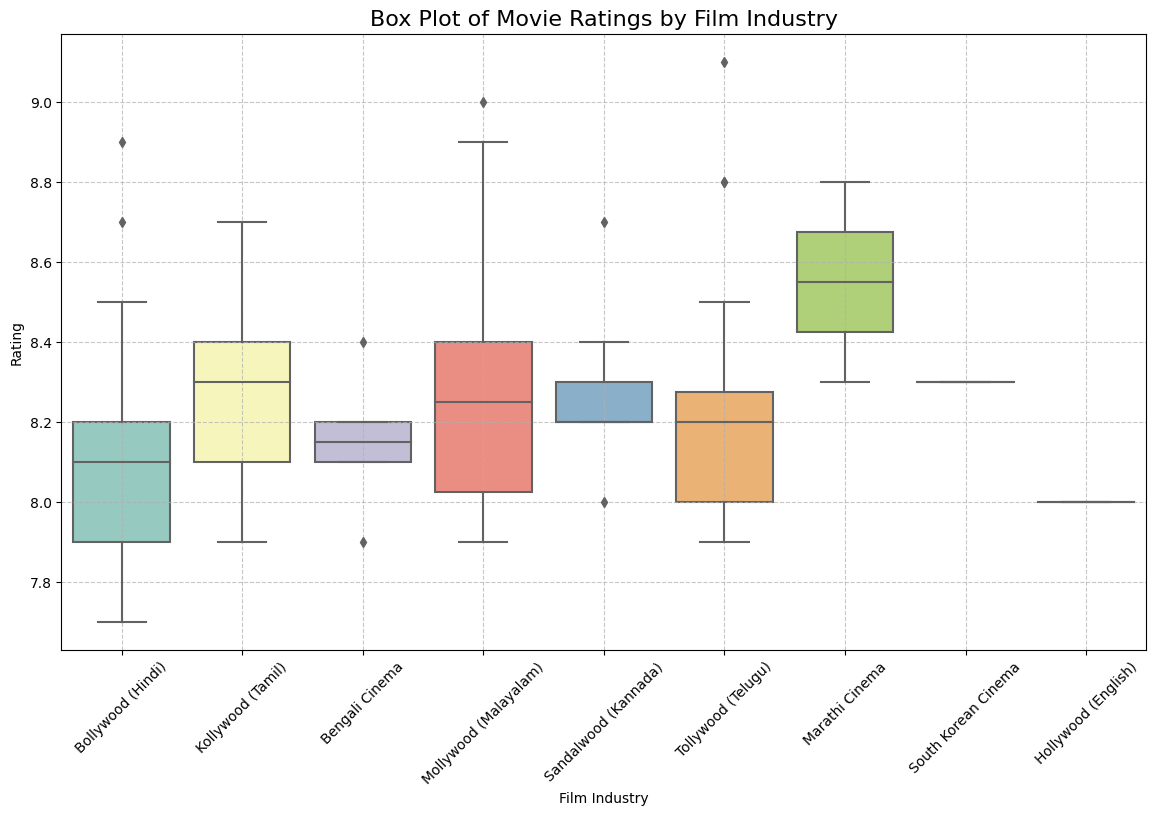

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Film Industry', y='Rating', palette='Set3')
plt.title('Box Plot of Movie Ratings by Film Industry', fontsize=16)
plt.xlabel('Film Industry')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


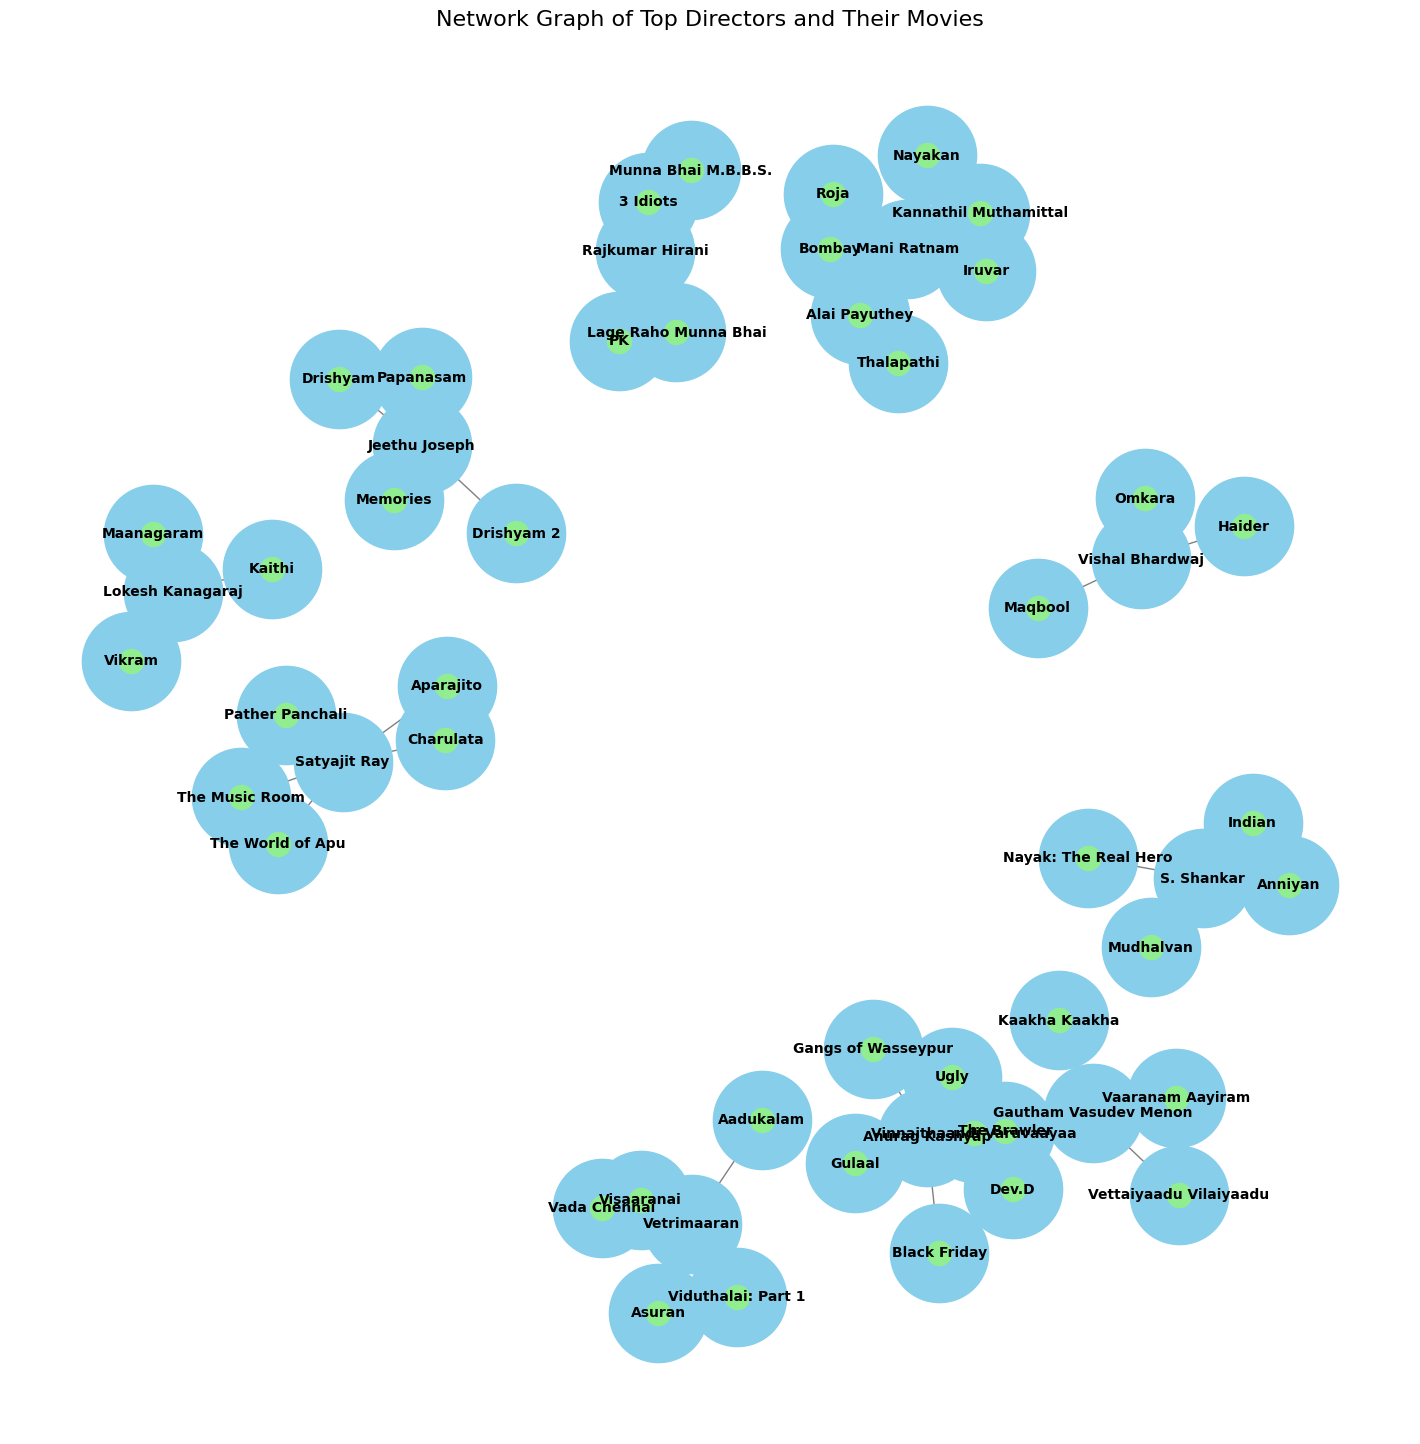

In [10]:
import networkx as nx

top_directors = df['Director'].value_counts().head(10).index
filtered_df = df[df['Director'].isin(top_directors)]

G = nx.Graph()

for _, row in filtered_df.iterrows():
    G.add_node(row['Movie name'], type='movie', rating=row['Rating'])
    G.add_node(row['Director'], type='director')
    G.add_edge(row['Director'], row['Movie name'], weight=row['Rating'])

pos = nx.spring_layout(G, k=0.5, seed=42)
plt.figure(figsize=(14, 14))

nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', edge_color='gray', font_size=10, font_weight='bold')
movie_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'movie']
nx.draw_networkx_nodes(G, pos, nodelist=movie_nodes, node_color='lightgreen')

plt.title('Network Graph of Top Directors and Their Movies', fontsize=16)
plt.show()


In [11]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


<Figure size 1400x1000 with 0 Axes>

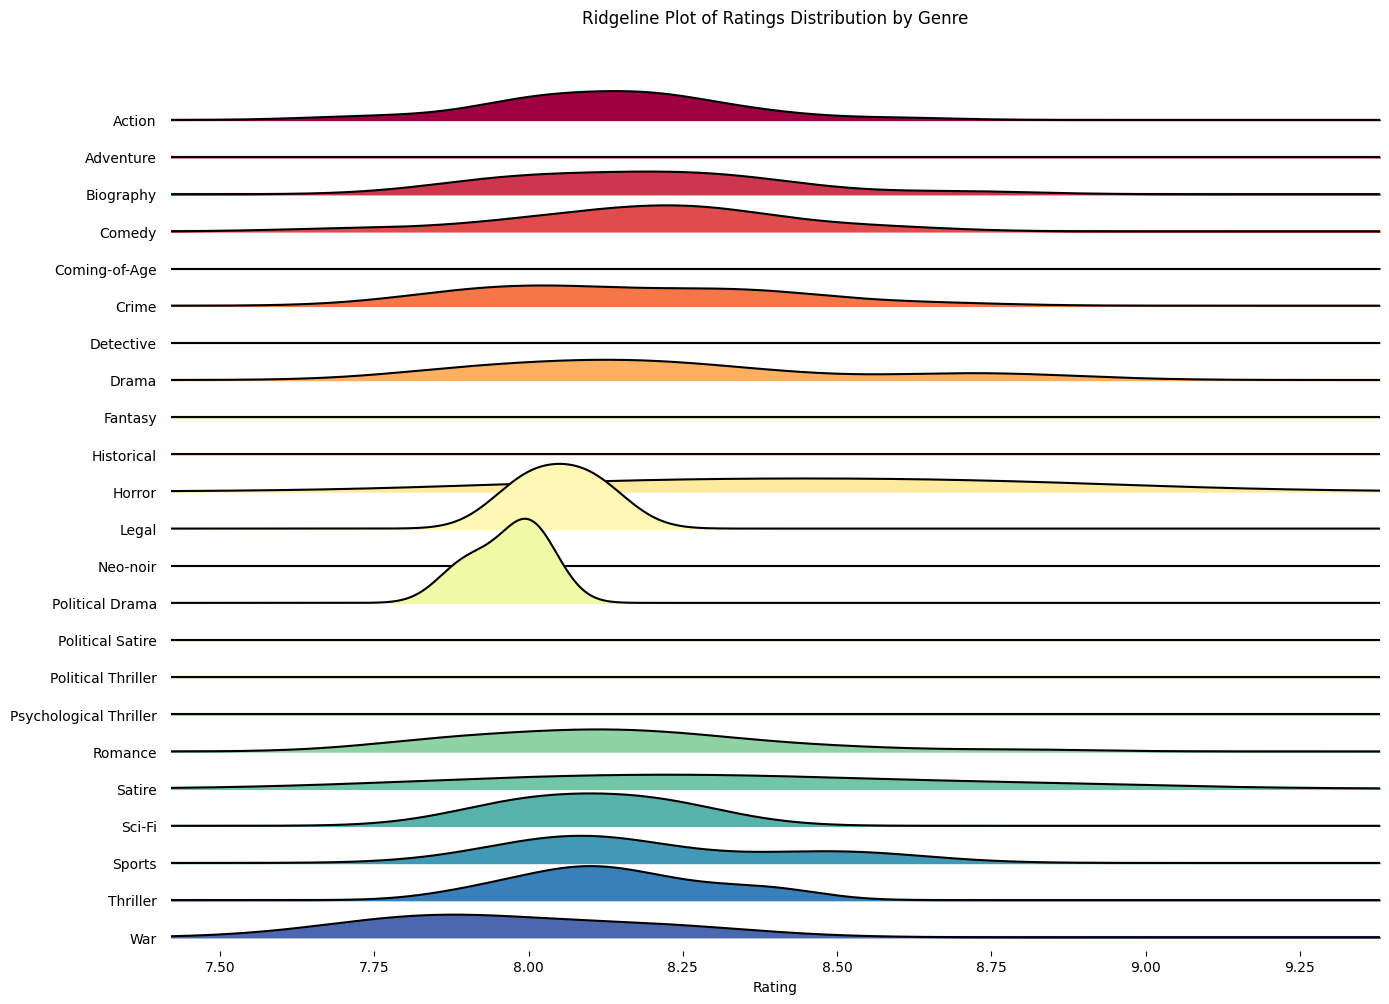

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
import joypy

df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

plt.figure(figsize=(14, 10))
joypy.joyplot(df, by='Genre', column='Rating', colormap=plt.cm.Spectral, figsize=(14,10), 
              title='Ridgeline Plot of Ratings Distribution by Genre')
plt.xlabel('Rating')
plt.show()


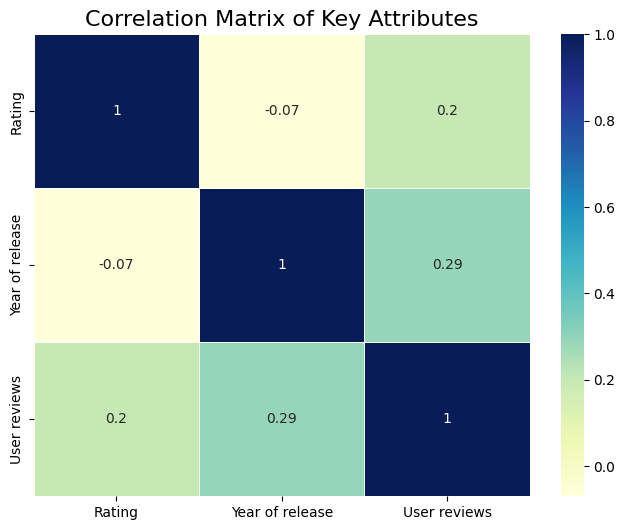

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = df[['Rating', 'Year of release', 'User reviews']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix of Key Attributes', fontsize=16)
plt.show()


In [14]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(
    x=df['Year of release'],
    y=df['Rating'],
    z=df['User reviews'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Rating'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='Year of Release',
    yaxis_title='Rating',
    zaxis_title='User Reviews'),
    title='3D Scatter Plot of Ratings, Year of Release, and User Reviews'
)
fig.show()


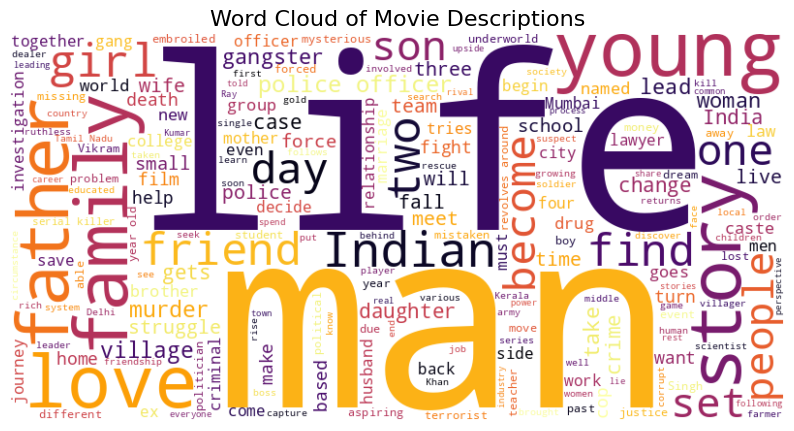

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Description'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions', fontsize=16)
plt.show()


In [16]:
import plotly.express as px

fig = px.treemap(df, path=['Genre', 'Movie name'], values='Rating',
                 color='Rating', hover_data=['Director'],
                 color_continuous_scale='RdBu',
                 title='Treemap of Movies by Genre and Rating')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [17]:
import plotly.graph_objects as go

sources = df['Film Industry'].apply(lambda x: df['Film Industry'].unique().tolist().index(x))
targets = df['Genre'].apply(lambda x: df['Genre'].unique().tolist().index(x.split(',')[0]) + len(df['Film Industry'].unique()))
values = df['Rating']

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=list(df['Film Industry'].unique()) + list(df['Genre'].apply(lambda x: x.split(',')[0]).unique()),
      color="blue"
    ),
    link=dict(
      source=sources, 
      target=targets,
      value=values
  ))])

fig.update_layout(title_text="Sankey Diagram of Movie Ratings Flow from Film Industry to Genres", font_size=10)
fig.show()


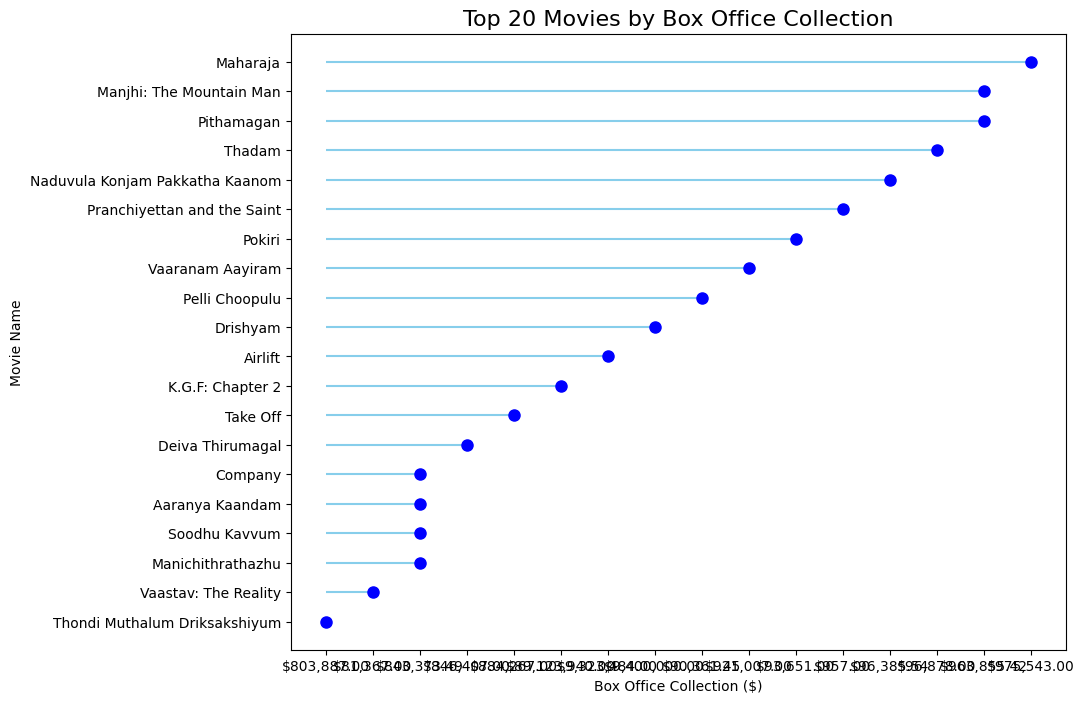

In [18]:
import matplotlib.pyplot as plt

top_20_movies = df.sort_values('Box office collection', ascending=False).head(20)
top_20_movies = top_20_movies[::-1]

fig, ax = plt.subplots(figsize=(10, 8))
ax.hlines(y=top_20_movies['Movie name'], xmin=0, xmax=top_20_movies['Box office collection'], color='skyblue')
ax.plot(top_20_movies['Box office collection'], top_20_movies['Movie name'], 'o', markersize=8, color='blue')
ax.set_title('Top 20 Movies by Box Office Collection', fontsize=16)
ax.set_xlabel('Box Office Collection ($)')
ax.set_ylabel('Movie Name')
plt.show()


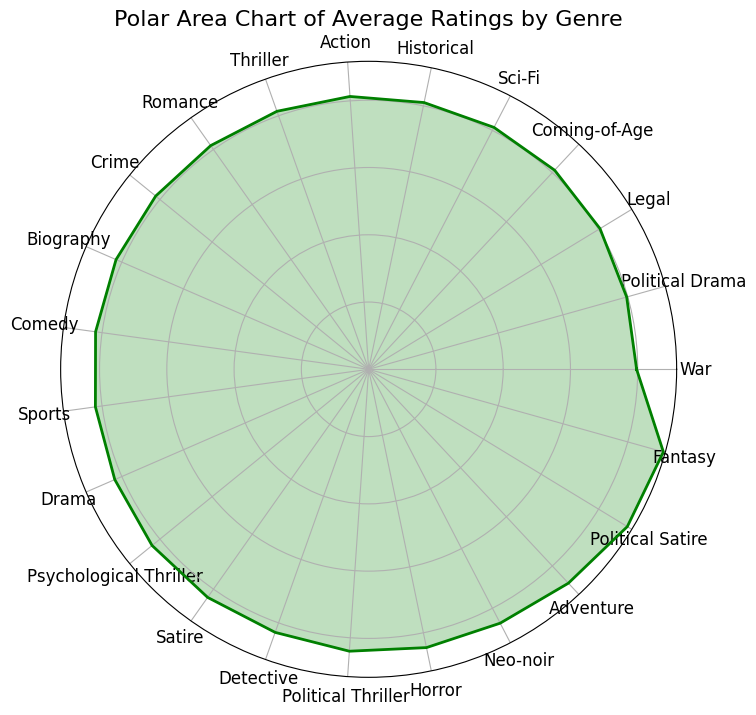

In [19]:
import matplotlib.pyplot as plt
import numpy as np

average_ratings = df.groupby('Genre')['Rating'].mean().sort_values()
categories = average_ratings.index.tolist()
ratings = average_ratings.values

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
ratings = np.concatenate((ratings,[ratings[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, ratings, color='green', alpha=0.25)
ax.plot(angles, ratings, color='green', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title('Polar Area Chart of Average Ratings by Genre', fontsize=16)
plt.show()


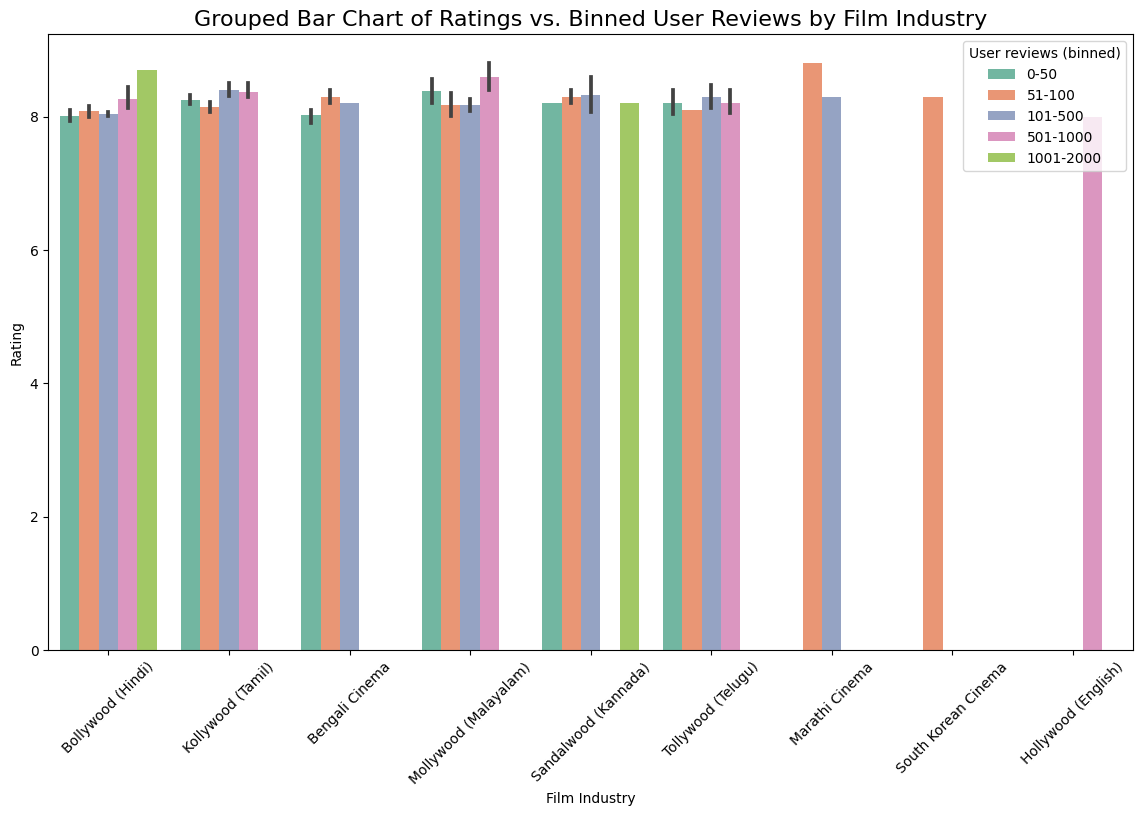

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['User reviews (binned)'] = pd.cut(df['User reviews'], bins=[0, 50, 100, 500, 1000, 2000], 
                                     labels=['0-50', '51-100', '101-500', '501-1000', '1001-2000'])

plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Film Industry', y='Rating', hue='User reviews (binned)', palette='Set2')
plt.title('Grouped Bar Chart of Ratings vs. Binned User Reviews by Film Industry', fontsize=16)
plt.xlabel('Film Industry')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend(title='User reviews (binned)')
plt.show()
